In [62]:
import sklearn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels import stats
import sklearn
from sklearn.model_selection import train_test_split
import  statsmodels.api as sm
from statsmodels.formula.api import ols

## Working on faithful eruptions and waiting data

In [98]:
df = pd.read_excel(r"E:\dbda khargar\Stats and R\CDAC_DataBook.xlsx",sheet_name="faithful")

In [102]:
x1,y1 = df.waiting,df.eruptions
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2)
x_train = sm.add_constant(x_train,prepend=False)
x_test=sm.add_constant(x_test,prepend=False)
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())
#y_pred = mod1.predict(x_test)

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     993.7
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.46e-82
Time:                        19:46:51   Log-Likelihood:                -154.01
No. Observations:                 217   AIC:                             312.0
Df Residuals:                     215   BIC:                             318.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0760      0.002     31.523      0.0

# Using the model plotting regression line and scatter plot


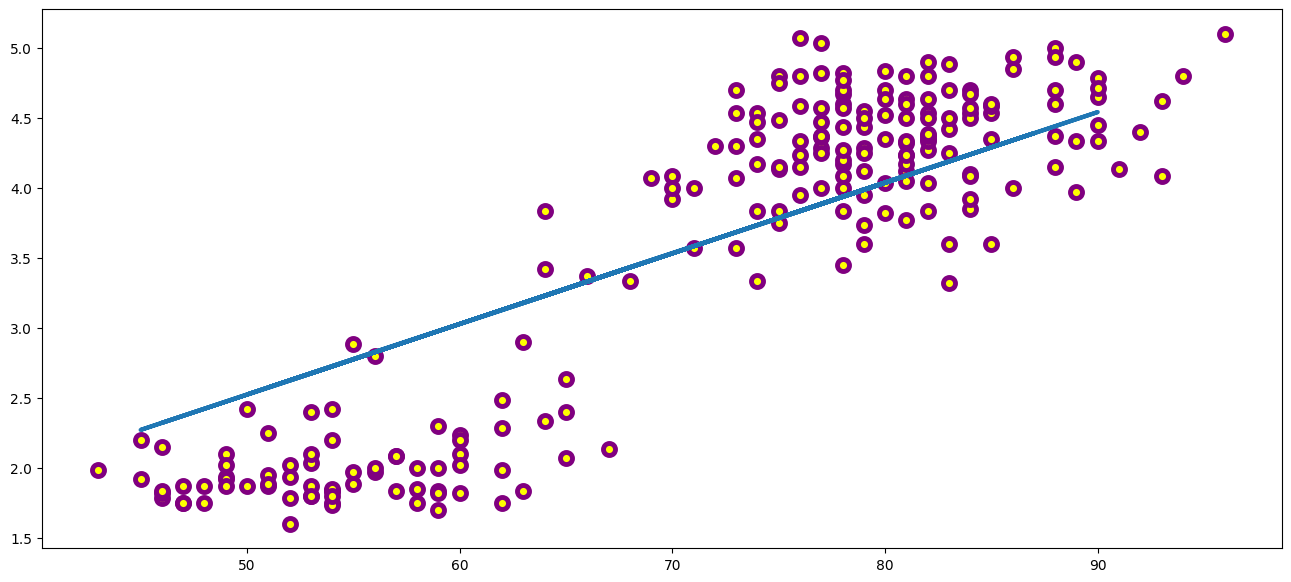

In [90]:
# to plot remove constant values from data
#plt.scatter(x_train,y_train,c="yellow",linewidth=3.5,edgecolor='purple',s=75)
fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(x_train, y_train, color="yellow", linewidths=3.5, edgecolors='purple', s=75)
ax.plot(x_test,y_pred,linewidth=3)
plt.show()

#without model data scatter

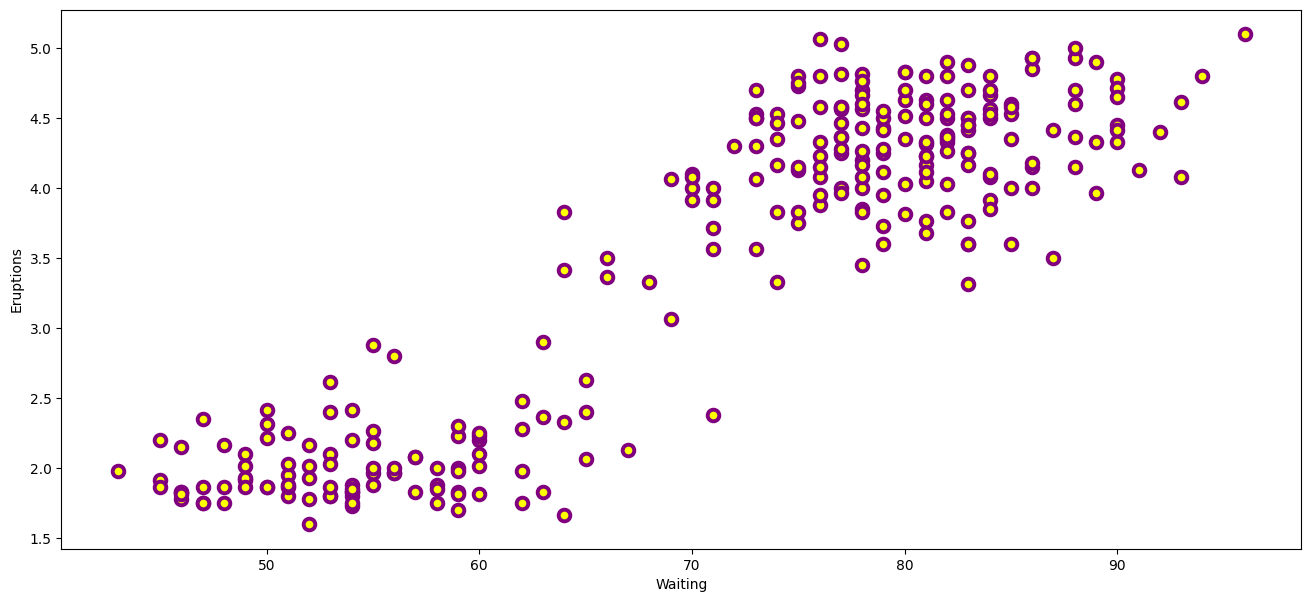

In [56]:
fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(df['waiting'],df['eruptions'],c="yellow",linewidth=2.8,edgecolor="purple",s=70)
ax.set_xlabel("Waiting")
ax.set_ylabel("Eruptions")
plt.show()

In [7]:
boston = pd.read_csv(r"E:\dbda khargar\Stats and R\BostonHousing.csv")

In [9]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [13]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

<Axes: xlabel='dis'>

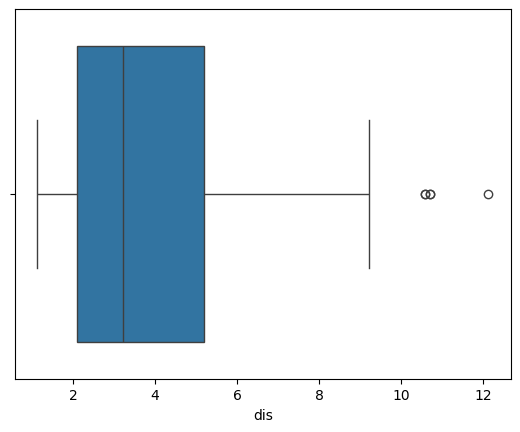

In [17]:
sns.boxplot(x=boston['dis'])

## Practicing multivariate outlier analysis on salaries data using boxplot

In [91]:
df = pd.read_excel(r'E:\dbda khargar\Stats and R\CDAC_DataBook.xlsx',sheet_name = 'salaries')
df.head()

,rank,discipline,yrs_phd,yrs_service,gender,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [92]:
df = df[['salary','gender','yrs_service']]

<Axes: xlabel='gender', ylabel='salary'>

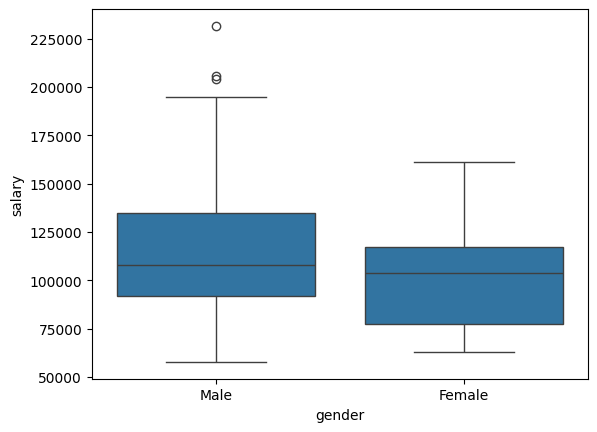

In [24]:
sns.boxplot(x=df['gender'],y=df['salary'])

<Axes: xlabel='rank', ylabel='salary'>

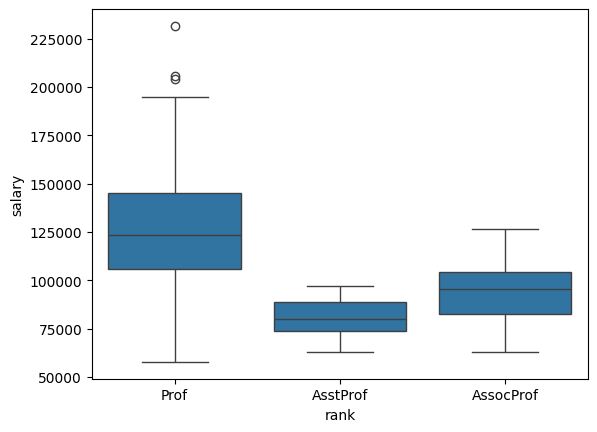

In [26]:
sns.boxplot(x=df['rank'],y=df['salary'])

## Using scatterplot

In [27]:
import matplotlib.pyplot as plt

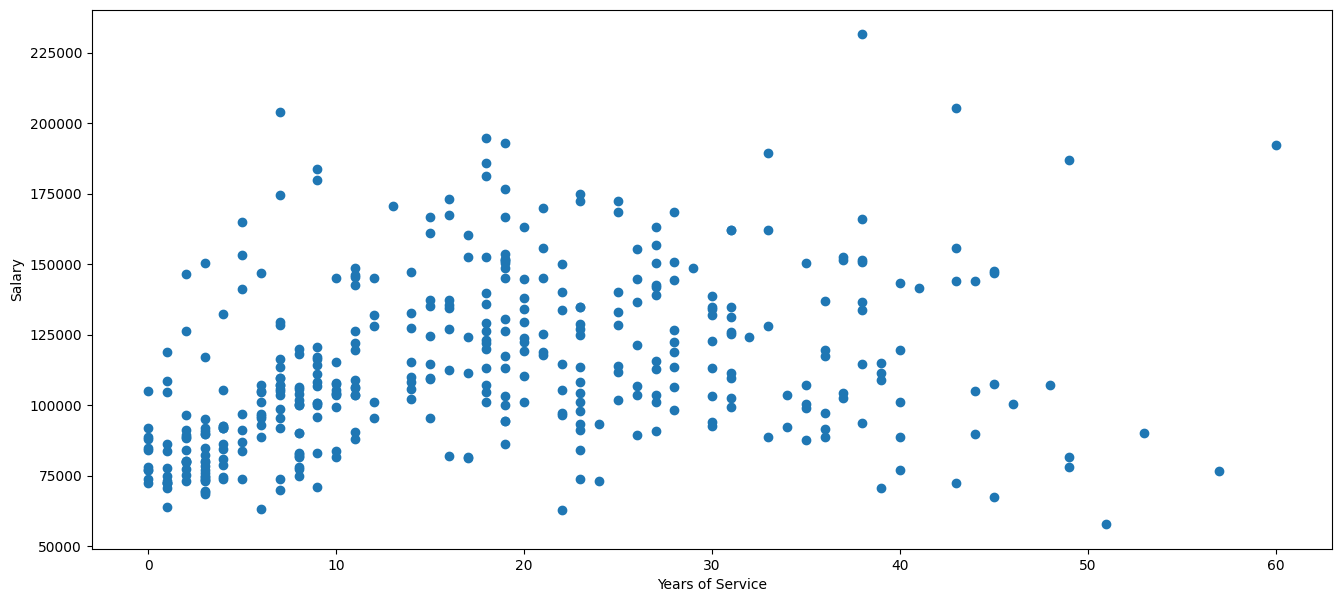

In [33]:
fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(df['yrs_service'], df['salary'])
ax.set_xlabel("Years of Service")
ax.set_ylabel("Salary")
plt.show()

# Using Z Score to identify outliers
## when z score is not in the interval of (-3,3)

In [93]:
from scipy import stats
import numpy as np

In [94]:
df.dtypes
df1 = df[['yrs_service','salary']]

In [95]:
z = np.abs(stats.zscore(df1))
threshold = 3 
np.where(z>threshold)

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))

In [96]:
## now locating these outliers in dataframe
df1.iloc[np.where(z>threshold)[0],np.where(z>threshold)[1]]

,salary,yrs_service,yrs_service,salary
43,231545,38,38,231545
131,76840,57,57,76840
330,192253,60,60,192253
364,205500,43,43,205500
